In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# Google Drive path where coursework material is available
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'My_Individual_Project'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['accepted_2007_to_2018q4.csv.zip', 'accepted_2013_to_2018_filtered.csv', 'accepted_2013_to_2018_latest.csv', 'accepted_2013_to_2018_latest1.csv', 'sample_model.ipynb', 'Cleaned_data.csv', 'Final_balanced_data.csv', 'ANN_2.ipynb', 'Data_cleaning.ipynb', 'FINAL_unbalancedData.csv', 'FINAL_balancedData.csv', 'FINAL_forModeling.csv', 'y_data.csv', 'x_data.csv', 'XGBoost_model.ipynb', 'Model4_XGBoost_GPU.ipynb', 'Model_4_XGBoost.ipynb', 'NN_Keras.ipynb', 'Model_3_Random_Forest.ipynb', 'Model_5_ANN.ipynb', 'XAI_RandomForest.ipynb', 'Model_2_Decesion_Tree.ipynb', 'Model_1_Logistic_regression.ipynb', '1_Filter_data_2013_to_2018.ipynb', '2_Filter_data_on_Loan_status.ipynb', '3_Filter Individual_loans_EDA_ and_cleaning.ipynb', 'Cleaned_data_dummy.csv', 'Copy of 3_Filter Individual_loans_EDA_ and_cleaning.ipynb', 'Individual_loans_hypothesisTesting.ipynb', 'Random_forest_model.ipynb']


In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay

In [ ]:
#load the data
df = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'FINAL_balancedData.csv'))


In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
0,733482
1,247784


In [ ]:
df.head()

,loan_amnt,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,disbursement_method,purpose_category,emp_length_years,term_years,fico_score,credit_history_years
0,24000.0,9.16,B,B2,MORTGAGE,76000.0,Not Verified,0,credit_card,UT,...,0.0,248838.0,43612.0,18700.0,Cash,credit_card,10.0,3,707.0,21.75
1,4800.0,10.42,B,B3,MORTGAGE,32000.0,Verified,0,debt_consolidation,KS,...,0.0,105487.0,8348.0,5100.0,Cash,debt_consolidation,5.0,3,707.0,9.66
2,18900.0,12.99,C,C1,RENT,45000.0,Not Verified,1,debt_consolidation,VT,...,0.0,171546.0,166746.0,7900.0,Cash,debt_consolidation,7.0,3,672.0,17.75
3,10000.0,16.29,D,D1,RENT,70000.0,Source Verified,1,debt_consolidation,FL,...,0.0,56175.0,40251.0,2300.0,Cash,debt_consolidation,2.0,3,682.0,6.75
4,20000.0,13.18,C,C3,RENT,70000.0,Source Verified,0,debt_consolidation,MI,...,0.0,43085.0,22860.0,11000.0,Cash,debt_consolidation,2.0,5,667.0,25.00


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# df= df.drop(['id', 'emp_length','hardship_flag', 'debt_settlement_flag','term','avg_cur_bal',
#              'total_bal_ex_mort','num_tl_120dpd_2m','tot_coll_amt'], axis =1)
# df= df.drop(['id', 'emp_length','hardship_flag', 'debt_settlement_flag','term',
#              'total_bal_ex_mort','num_tl_120dpd_2m','tot_coll_amt','emp_title','initial_list_status'], axis =1)

In [ ]:
df.head()

,loan_amnt,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,disbursement_method,purpose_category,emp_length_years,term_years,fico_score,credit_history_years
0,24000.0,9.16,B,B2,MORTGAGE,76000.0,Not Verified,0,credit_card,UT,18.96,0.0,1.0,999.0,999.0,9.0,0.0,35610.0,92.7,25.0,2861.53,0.0,0.0,235379.0,0.0,1.0,0.0,0.0,30.0,8002.0,57.0,0.0,0.0,10377.0,83.0,38400.0,1.0,6.0,1.0,1.0,26153.0,3.0,100.0,0.0,0.0,131.0,261.0,103.0,18.0,4.0,107.0,2.0,0.0,3.0,7.0,3.0,4.0,7.0,7.0,14.0,7.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,248838.0,43612.0,18700.0,Cash,credit_card,10.0,3,707.0,21.75
1,4800.0,10.42,B,B3,MORTGAGE,32000.0,Verified,0,debt_consolidation,KS,11.70,0.0,0.0,999.0,999.0,6.0,0.0,8348.0,65.7,16.0,551.43,0.0,0.0,97429.0,0.0,0.0,0.0,0.0,76.0,0.0,-1.0,0.0,2.0,1860.0,66.0,12700.0,0.0,0.0,0.0,2.0,16238.0,464.0,90.9,0.0,0.0,84.0,116.0,24.0,24.0,1.0,24.0,5.0,0.0,3.0,5.0,3.0,6.0,2.0,5.0,13.0,5.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,105487.0,8348.0,5100.0,Cash,debt_consolidation,5.0,3,707.0,9.66
2,18900.0,12.99,C,C1,RENT,45000.0,Not Verified,1,debt_consolidation,VT,10.21,0.0,1.0,49.0,999.0,26.0,0.0,12500.0,65.8,37.0,2806.10,0.0,0.0,166746.0,-1.0,-1.0,-1.0,-1.0,999.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,19000.0,-1.0,-1.0,-1.0,0.0,6413.0,3069.0,61.2,0.0,0.0,213.0,143.0,25.0,25.0,0.0,55.0,3.0,0.0,3.0,8.0,4.0,8.0,22.0,9.0,15.0,8.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,171546.0,166746.0,7900.0,Cash,debt_consolidation,7.0,3,672.0,17.75
3,10000.0,16.29,D,D1,RENT,70000.0,Source Verified,1,debt_consolidation,FL,22.80,0.0,0.0,65.0,999.0,7.0,0.0,2633.0,36.1,25.0,443.61,0.0,0.0,40251.0,1.0,4.0,4.0,7.0,2.0,37618.0,77.0,1.0,2.0,740.0,72.0,7300.0,2.0,5.0,1.0,9.0,5750.0,1458.0,36.6,0.0,0.0,80.0,62.0,12.0,2.0,0.0,12.0,12.0,1.0,2.0,3.0,2.0,2.0,21.0,3.0,4.0,3.0,0.0,0.0,5.0,96.0,50.0,0.0,0.0,56175.0,40251.0,2300.0,Cash,debt_consolidation,2.0,3,682.0,6.75
4,20000.0,13.18,C,C3,RENT,70000.0,Source Verified,0,debt_consolidation,MI,13.85,0.0,1.0,999.0,70.0,6.0,1.0,4317.0,29.8,22.0,5191.85,0.0,0.0,22860.0,-1.0,-1.0,-1.0,-1.0,999.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,14500.0,-1.0,-1.0,-1.0,3.0,3810.0,7958.0,27.7,0.0,0.0,157.0,299.0,4.0,4.0,2.0,43.0,5.0,0.0,2.0,3.0,2.0,9.0,8.0,3.0,11.0,3.0,0.0,0.0,1.0,100.0,50.0,1.0,0.0,43085.0,22860.0,11000.0,Cash,debt_consolidation,2.0,5,667.0,25.00


In [ ]:
cat_col = df.select_dtypes(include = [ 'object']).columns.to_list()

In [ ]:
df[cat_col].head()

,grade,sub_grade,home_ownership,verification_status,purpose,addr_state,disbursement_method,purpose_category
0,B,B2,MORTGAGE,Not Verified,credit_card,UT,Cash,credit_card
1,B,B3,MORTGAGE,Verified,debt_consolidation,KS,Cash,debt_consolidation
2,C,C1,RENT,Not Verified,debt_consolidation,VT,Cash,debt_consolidation
3,D,D1,RENT,Source Verified,debt_consolidation,FL,Cash,debt_consolidation
4,C,C3,RENT,Source Verified,debt_consolidation,MI,Cash,debt_consolidation


In [ ]:
df['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY'], dtype=object)

In [ ]:
#grade and subgrade - are odrinal values
#home ownership, verification status, purpose, addr_state, disbursement_method - one hot encoding

In [ ]:
# verification_status_one_hot = pd.get_dummies(df_balanced['verification_status'], dtype=int)
verification_status_one_hot = pd.get_dummies(df['verification_status'], dtype=int)

In [ ]:
verification_status_one_hot.head()

,Not Verified,Source Verified,Verified
0,1,0,0
1,0,0,1
2,1,0,0
3,0,1,0
4,0,1,0


In [ ]:
home_ownership_one_hot = pd.get_dummies(df['home_ownership'], dtype=int)
home_ownership_one_hot.head()

,ANY,MORTGAGE,OWN,RENT
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:

purpose_one_hot = pd.get_dummies(df['purpose'], dtype=int)
purpose_one_hot.head()


,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

addr_state_one_hot = pd.get_dummies(df['addr_state'], dtype=int)
addr_state_one_hot.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

disbursement_method_one_hot = pd.get_dummies(df['disbursement_method'], dtype=int)
disbursement_method_one_hot.head()


,Cash,DirectPay
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
purpose_category_one_hot = pd.get_dummies(df['purpose_category'], dtype=int)
purpose_category_one_hot.head()


,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,others,small_business,vacation
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:

label_encoder = LabelEncoder()

In [ ]:
bi_col = ['grade','sub_grade']

In [ ]:
for col in bi_col:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [ ]:
one_hot = pd.concat([disbursement_method_one_hot,addr_state_one_hot,purpose_one_hot,verification_status_one_hot,home_ownership_one_hot,purpose_category_one_hot], axis =1)

In [ ]:
one_hot.head()

,Cash,DirectPay,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified,ANY,MORTGAGE,OWN,RENT
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
df1 = df.copy()

In [ ]:
df1 = pd.concat([df1,one_hot], axis =1)

In [ ]:
df1.head()

,loan_amnt,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,disbursement_method,purpose_category,emp_length_years,term_years,fico_score,credit_history_years,Cash,DirectPay,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified,ANY,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,others,small_business,vacation
0,24000.0,9.16,1,6,MORTGAGE,76000.0,Not Verified,0,credit_card,UT,18.96,0.0,1.0,999.0,999.0,9.0,0.0,35610.0,92.7,25.0,2861.53,0.0,0.0,235379.0,0.0,1.0,0.0,0.0,30.0,8002.0,57.0,0.0,0.0,10377.0,83.0,38400.0,1.0,6.0,1.0,1.0,26153.0,3.0,100.0,0.0,0.0,131.0,261.0,103.0,18.0,4.0,107.0,2.0,0.0,3.0,7.0,3.0,4.0,7.0,7.0,14.0,7.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,248838.0,43612.0,18700.0,Cash,credit_card,10.0,3,707.0,21.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,4800.0,10.42,1,7,MORTGAGE,32000.0,Verified,0,debt_consolidation,KS,11.70,0.0,0.0,999.0,999.0,6.0,0.0,8348.0,65.7,16.0,551.43,0.0,0.0,97429.0,0.0,0.0,0.0,0.0,76.0,0.0,-1.0,0.0,2.0,1860.0,66.0,12700.0,0.0,0.0,0.0,2.0,16238.0,464.0,90.9,0.0,0.0,84.0,116.0,24.0,24.0,1.0,24.0,5.0,0.0,3.0,5.0,3.0,6.0,2.0,5.0,13.0,5.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,105487.0,8348.0,5100.0,Cash,debt_consolidation,5.0,3,707.0,9.66,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,18900.0,12.99,2,10,RENT,45000.0,Not Verified,1,debt_consolidation,VT,10.21,0.0,1.0,49.0,999.0,26.0,0.0,12500.0,65.8,37.0,2806.10,0.0,0.0,166746.0,-1.0,-1.0,-1.0,-1.0,999.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,19000.0,-1.0,-1.0,-1.0,0.0,6413.0,3069.0,61.2,0.0,0.0,213.0,143.0,25.0,25.0,0.0,55.0,3.0,0.0,3.0,8.0,4.0,8.0,22.0,9.0,15.0,8.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,171546.0,166746.0,7900.0,Cash,debt_consolidation,7.0,3,672.0,17.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,10000.0,16.29,3,15,RENT,70000.0,Source Verified,1,debt_consolidation,FL,22.80,0.0,0.0,65.0,999.0,7.0,0.0,2633.0,36.1,25.0,443.61,0.0,0.0,40251.0,1.0,4.0,4.0,7.0,2.0,37618.0,77.0,1.0,2.0,740.0,72.0,7300.0,2.0,5.0,1.0,9.0,5750.0,1458.0,36.6,0.0,0.0,80.0,62.0,12.0,2.0,0.0,12.0,12.0,1.0,2.0,3.0,2.0,2.0,21.0,3.0,4.0,3.0,0.0,0.0,5.0,96.0,50.0,0.0,0.0,56175.0,40251.0,2300.0,Cash,debt_consolidation,2.0,3,682.0,6.75,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,20000.0,13.18,2,12,RENT,70000.0,S

In [ ]:
df1 = df1.drop(['verification_status','home_ownership','purpose','addr_state','disbursement_method'], axis =1)

In [ ]:

df1 = df1.drop('purpose_category',axis=1)

In [ ]:
df1.head()

,loan_amnt,int_rate,grade,sub_grade,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,purpose_category,emp_length_years,term_years,fico_score,credit_history_years,Cash,DirectPay,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified,ANY,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,others,small_business,vacation
0,24000.0,9.16,1,6,76000.0,0,18.96,0.0,1.0,999.0,999.0,9.0,0.0,35610.0,92.7,25.0,2861.53,0.0,0.0,235379.0,0.0,1.0,0.0,0.0,30.0,8002.0,57.0,0.0,0.0,10377.0,83.0,38400.0,1.0,6.0,1.0,1.0,26153.0,3.0,100.0,0.0,0.0,131.0,261.0,103.0,18.0,4.0,107.0,2.0,0.0,3.0,7.0,3.0,4.0,7.0,7.0,14.0,7.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,248838.0,43612.0,18700.0,credit_card,10.0,3,707.0,21.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,4800.0,10.42,1,7,32000.0,0,11.70,0.0,0.0,999.0,999.0,6.0,0.0,8348.0,65.7,16.0,551.43,0.0,0.0,97429.0,0.0,0.0,0.0,0.0,76.0,0.0,-1.0,0.0,2.0,1860.0,66.0,12700.0,0.0,0.0,0.0,2.0,16238.0,464.0,90.9,0.0,0.0,84.0,116.0,24.0,24.0,1.0,24.0,5.0,0.0,3.0,5.0,3.0,6.0,2.0,5.0,13.0,5.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,105487.0,8348.0,5100.0,debt_consolidation,5.0,3,707.0,9.66,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,18900.0,12.99,2,10,45000.0,1,10.21,0.0,1.0,49.0,999.0,26.0,0.0,12500.0,65.8,37.0,2806.10,0.0,0.0,166746.0,-1.0,-1.0,-1.0,-1.0,999.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,19000.0,-1.0,-1.0,-1.0,0.0,6413.0,3069.0,61.2,0.0,0.0,213.0,143.0,25.0,25.0,0.0,55.0,3.0,0.0,3.0,8.0,4.0,8.0,22.0,9.0,15.0,8.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,171546.0,166746.0,7900.0,debt_consolidation,7.0,3,672.0,17.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,10000.0,16.29,3,15,70000.0,1,22.80,0.0,0.0,65.0,999.0,7.0,0.0,2633.0,36.1,25.0,443.61,0.0,0.0,40251.0,1.0,4.0,4.0,7.0,2.0,37618.0,77.0,1.0,2.0,740.0,72.0,7300.0,2.0,5.0,1.0,9.0,5750.0,1458.0,36.6,0.0,0.0,80.0,62.0,12.0,2.0,0.0,12.0,12.0,1.0,2.0,3.0,2.0,2.0,21.0,3.0,4.0,3.0,0.0,0.0,5.0,96.0,50.0,0.0,0.0,56175.0,40251.0,2300.0,debt_consolidation,2.0,3,682.0,6.75,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,20000.0,13.18,2,12,70000.0,0,13.85,0.0,1.0,999.0,70.0,6.0,1.0,4317.0,29.8,22.0,5191.85,0.0,0.0,22860.0,-1.0,-1.0,-1.0,-1.0,999.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,14500.0,-1.0,-1.0,-1.0,3.0,3810.0,7958.0,27.7,0.0,0.0,157.0,299.0,4.0,4.0,2.0,43.0,5.0,0.0,2.0,3.0,2.0,9.0,8.0,3.0,11.0,3.0,0.0,

In [ ]:
df1.head()

,loan_amnt,int_rate,grade,sub_grade,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,purpose_category,emp_length_years,term_years,fico_score,credit_history_years,Cash,DirectPay,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified,ANY,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,others,small_business,vacation
0,24000.0,9.16,1,6,76000.0,0,18.96,0.0,1.0,999.0,999.0,9.0,0.0,35610.0,92.7,25.0,2861.53,0.0,0.0,235379.0,0.0,1.0,0.0,0.0,30.0,8002.0,57.0,0.0,0.0,10377.0,83.0,38400.0,1.0,6.0,1.0,1.0,26153.0,3.0,100.0,0.0,0.0,131.0,261.0,103.0,18.0,4.0,107.0,2.0,0.0,3.0,7.0,3.0,4.0,7.0,7.0,14.0,7.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,248838.0,43612.0,18700.0,credit_card,10.0,3,707.0,21.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,4800.0,10.42,1,7,32000.0,0,11.70,0.0,0.0,999.0,999.0,6.0,0.0,8348.0,65.7,16.0,551.43,0.0,0.0,97429.0,0.0,0.0,0.0,0.0,76.0,0.0,-1.0,0.0,2.0,1860.0,66.0,12700.0,0.0,0.0,0.0,2.0,16238.0,464.0,90.9,0.0,0.0,84.0,116.0,24.0,24.0,1.0,24.0,5.0,0.0,3.0,5.0,3.0,6.0,2.0,5.0,13.0,5.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,105487.0,8348.0,5100.0,debt_consolidation,5.0,3,707.0,9.66,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,18900.0,12.99,2,10,45000.0,1,10.21,0.0,1.0,49.0,999.0,26.0,0.0,12500.0,65.8,37.0,2806.10,0.0,0.0,166746.0,-1.0,-1.0,-1.0,-1.0,999.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,19000.0,-1.0,-1.0,-1.0,0.0,6413.0,3069.0,61.2,0.0,0.0,213.0,143.0,25.0,25.0,0.0,55.0,3.0,0.0,3.0,8.0,4.0,8.0,22.0,9.0,15.0,8.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,171546.0,166746.0,7900.0,debt_consolidation,7.0,3,672.0,17.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,10000.0,16.29,3,15,70000.0,1,22.80,0.0,0.0,65.0,999.0,7.0,0.0,2633.0,36.1,25.0,443.61,0.0,0.0,40251.0,1.0,4.0,4.0,7.0,2.0,37618.0,77.0,1.0,2.0,740.0,72.0,7300.0,2.0,5.0,1.0,9.0,5750.0,1458.0,36.6,0.0,0.0,80.0,62.0,12.0,2.0,0.0,12.0,12.0,1.0,2.0,3.0,2.0,2.0,21.0,3.0,4.0,3.0,0.0,0.0,5.0,96.0,50.0,0.0,0.0,56175.0,40251.0,2300.0,debt_consolidation,2.0,3,682.0,6.75,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,20000.0,13.18,2,12,70000.0,0,13.85,0.0,1.0,999.0,70.0,6.0,1.0,4317.0,29.8,22.0,5191.85,0.0,0.0,22860.0,-1.0,-1.0,-1.0,-1.0,999.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,14500.0,-1.0,-1.0,-1.0,3.0,3810.0,7958.0,27.7,0.0,0.0,157.0,299.0,4.0,4.0,2.0,43.0,5.0,0.0,2.0,3.0,2.0,9.0,8.0,3.0,11.0,3.0,0.0,

In [ ]:
# df1.to_csv('drive/My Drive/My_Individual_Project/FINAL_forModeling.csv', index=False, encoding='utf-8')

In [ ]:
#Top 20 XGBoost features
XgBoost_features =['Verified', 'inq_last_6mths', 'Source Verified', 'sub_grade', 'grade', 'num_tl_op_past_12m', 'major_purchase', 'Not Verified', 'acc_open_past_24mths', 'delinq_2yrs', 'int_rate', 'credit_card', 'mort_acc', 'term_years', 'MORTGAGE', 'num_actv_rev_tl', 'RENT', 'other', 'mths_since_last_delinq', 'open_il_12m']

In [ ]:
#Combined 26 features which include 20 top features from XGBoost and Random Forest
combined_unique_features = [
    "acc_open_past_24mths",
    "credit_card",
    "delinq_2yrs",
    "emp_length_years",
    "fico_score",
    "grade",
    "inq_last_6mths",
    "int_rate",
    "major_purchase",
    "MORTGAGE",
    "mort_acc",
    "mths_since_last_delinq",
    "mths_since_last_record",
    "mths_since_recent_inq",
    "Not Verified",
    "num_actv_rev_tl",
    "num_rev_tl_bal_gt_0",
    "num_tl_op_past_12m",
    "open_il_12m",
    "other",
    "pub_rec",
    "RENT",
    "Source Verified",
    "sub_grade",
    "term_years",
    "Verified"
]

In [ ]:
# df2 = df1[XgBoost_features+ ['loan_status']]
df2 = df1[combined_unique_features+ ['loan_status']]

In [ ]:

def oversampling_smote(df, target_col, ratio_upsample=0.5, random_state=7):
    X = df.drop(columns=[target_col]) #dependent variable
    y = df[target_col]

    print("Original class distribution:")
    print(y.value_counts())
    print(f"Majority class: {sum(y == 0)}")
    print(f"Minority class: {sum(y == 1)}")

    #calculate number of samples required for minority class
    sum_minority = sum(y == 1)
    num_samples = int(sum_minority * (1 + ratio_upsample))

    # Perform SMOTE
    smote = SMOTE(sampling_strategy={1: num_samples}, random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # concatenate dependent and independent variables
    df_upsampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                                pd.Series(y_resampled, name=target_col)], axis=1)


    print("\Oversampled class distribution:")# Resampled class distribution
    print(df_upsampled[target_col].value_counts())

    # Reset index
    df_upsampled = df_upsampled.sample(frac=1, random_state=random_state).reset_index(drop=True)

    return df_upsampled #return upsampled class



In [ ]:
#df1 with different features which includ -1. All features, top 15 features of Random forest, top 20 features of Random forest, combined top 20 features of XGBoost and Random forest
df_upsampled = oversampling_smote(df1, 'loan_status', upsample_ratio=0.5, random_state=7)

#shape of upsampled data
print(f"\nShape of the oversampled DataFrame: {df_upsampled.shape}")

#increase in length data
original_size = len(df1)
oversampled_size = len(df_upsampled)
percentage_increase = ((oversampled_size - original_size) / original_size) * 100

print(f"Percentage increase in data: {percentage_increase:.2f}%")


X = df_upsampled.drop('loan_status', axis=1)
y = df_upsampled['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size==0.8, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Original class distribution:
loan_status
0    733482
1    247784
Name: count, dtype: int64
Majority class: 733482
Minority class: 247784

Oversampled class distribution:
loan_status
0    733482
1    371676
Name: count, dtype: int64

Shape of the oversampled DataFrame: (1105158, 157)
Percentage increase in data: 12.63%

Training set shape: (884126, 156)
Testing set shape: (221032, 156)


In [ ]:
df1.head()

,loan_amnt,int_rate,grade,sub_grade,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bc_limit,total_il_high_credit_limit,emp_length_years,term_years,fico_score,fico_score_last,credit_history_years,Cash,DirectPay,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified,ANY,MORTGAGE,OWN,RENT
0,7500.0,12.49,1,9,55000.0,1,9.95,0.0,6.0,76.0,47.0,12.0,2.0,8910.0,63.6,27.0,0.0,0.0,65216.0,-1.0,-1.0,-1.0,-1.0,999.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,14000.0,-1.0,-1.0,-1.0,6.0,5929.0,1570.0,82.6,0.0,0.0,172.0,181.0,3.0,3.0,1.0,17.0,1.0,0.0,4.0,8.0,4.0,7.0,12.0,10.0,14.0,8.0,0.0,0.0,3.0,96.3,50.0,1.0,1.0,78528.0,9000.0,5028.0,2,3,667.0,249.5,15.08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,13500.0,8.18,1,5,73980.0,0,22.86,0.0,0.0,33.0,999.0,12.0,0.0,12971.0,29.9,37.0,0.0,0.0,90487.0,-1.0,-1.0,-1.0,-1.0,999.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,43400.0,-1.0,-1.0,-1.0,5.0,8226.0,27757.0,22.2,0.0,0.0,120.0,234.0,2.0,2.0,0.0,2.0,15.0,0.0,3.0,5.0,5.0,6.0,27.0,9.0,10.0,5.0,0.0,0.0,4.0,94.1,40.0,0.0,0.0,130503.0,35700.0,87103.0,2,3,682.0,812.0,19.58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,34625.0,26.24,4,24,75325.0,1,8.24,1.0,0.0,16.0,999.0,8.0,0.0,14920.0,44.5,12.0,0.0,0.0,293340.0,1.0,0.0,0.0,0.0,999.0,0.0,-1.0,2.0,3.0,5081.0,45.0,33500.0,0.0,1.0,0.0,3.0,36668.0,1575.0,88.0,0.0,0.0,129.0,123.0,6.0,6.0,1.0,6.0,14.0,0.0,3.0,5.0,3.0,5.0,0.0,7.0,11.0,6.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,376356.0,13100.0,0.0,10,5,667.0,567.0,10.33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,10800.0,15.61,3,15,34888.0,0,25.15,1.0,0.0,12.0,999.0,7.0,0.0,5669.0,55.6,10.0,0.0,0.0,28237.0,-1.0,-1.0,-1.0,-1.0,999.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,10200.0,-1.0,-1.0,-1.0,4.0,4706.0,4777.0,63.1,0.0,0.0,60.0,71.0,16.0,16.0,0.0,71.0,1.0,0.0,0.0,4.0,1.0,1.0,4.0,5.0,6.0,4.0,0.0,0.0,0.0,90.0,42.9,0.0,0.0,40346.0,0.0,30146.0,3,5,672.0,692.0,5.92,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5500.0,12.74,2,10,60000.0,1,10.32,1.0,1.0,7.0,999.0,7.0,0.0,0.0,0.0,34.0,0.0,0.0,218475.0,0.0,3.0,0.0,1.0,18.0,48668.0,85.0,0.0,1.0,0.0,74.0,8000.0,0.0,0.0,2.0,3.0,36413.0,7700.0,0.0,1.0,0.0,136.0,130.0,14.0,8.0,4.0,88.0,3.0,1.0,0.0,0.0,1.0,10.0,7.0,3.0,22.0,0.0,0.0,1.0,1.0,91.2,0.0,0.0,0.0,238733.0,7700.0,57572.0,10,3,692.0,249.5,11.33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
rf = RandomForestClassifier( max_depth= 12, n_estimators= 100, random_state = 29) #hyperparameter tunning done on number of trees
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, random_state=29)

In [2]:
pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
print("Classification Report:") # cobined top 20 of xgBoost and random forest which gave 26 total features
print(classification_report(y_test, pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85    146680
           1       0.83      0.42      0.56     74352

    accuracy                           0.78    221032
   macro avg       0.80      0.69      0.70    221032
weighted avg       0.79      0.78      0.75    221032



In [ ]:
#overall random forest features perform better

In [ ]:
print("Classification Report:") # top 20 features of XGBoost
print(classification_report(y_test, pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85    146680
           1       0.83      0.42      0.56     74352

    accuracy                           0.78    221032
   macro avg       0.80      0.69      0.70    221032
weighted avg       0.79      0.78      0.75    221032



In [ ]:
print("Classification Report:") #all features , similar performance obtained by top 20 features of Random forest
print(classification_report(y_test, pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85    146928
           1       0.85      0.53      0.65     86493

    accuracy                           0.79    233421
   macro avg       0.81      0.73      0.75    233421
weighted avg       0.80      0.79      0.77    233421



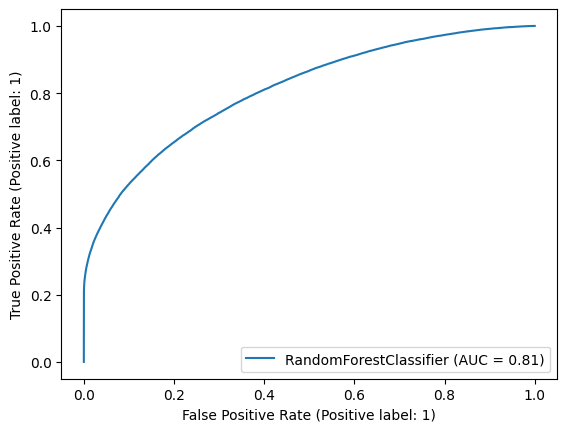

In [ ]:
RocCurveDisplay.from_estimator(rf, X_test, y_test) #top 15 features of Random forest

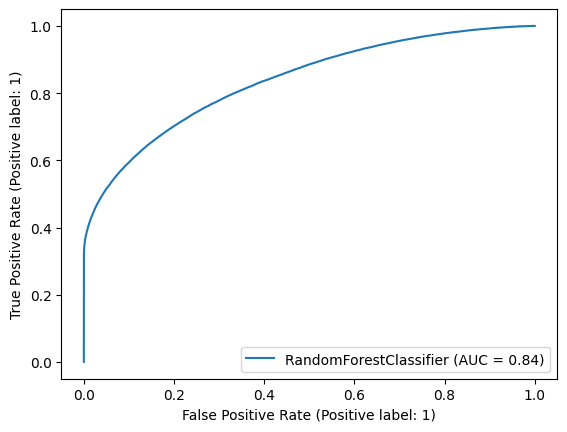

In [ ]:
RocCurveDisplay.from_estimator(rf, X_test, y_test) #All features and top 20 features of Random forest

In [ ]:
feature_importance =rf.feature_importances_ #Feature importance obtained by model

In [ ]:
feature_importance = pd.Series(feature_importance, index = X.columns).sort_values(ascending=False)

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Feature Importance')

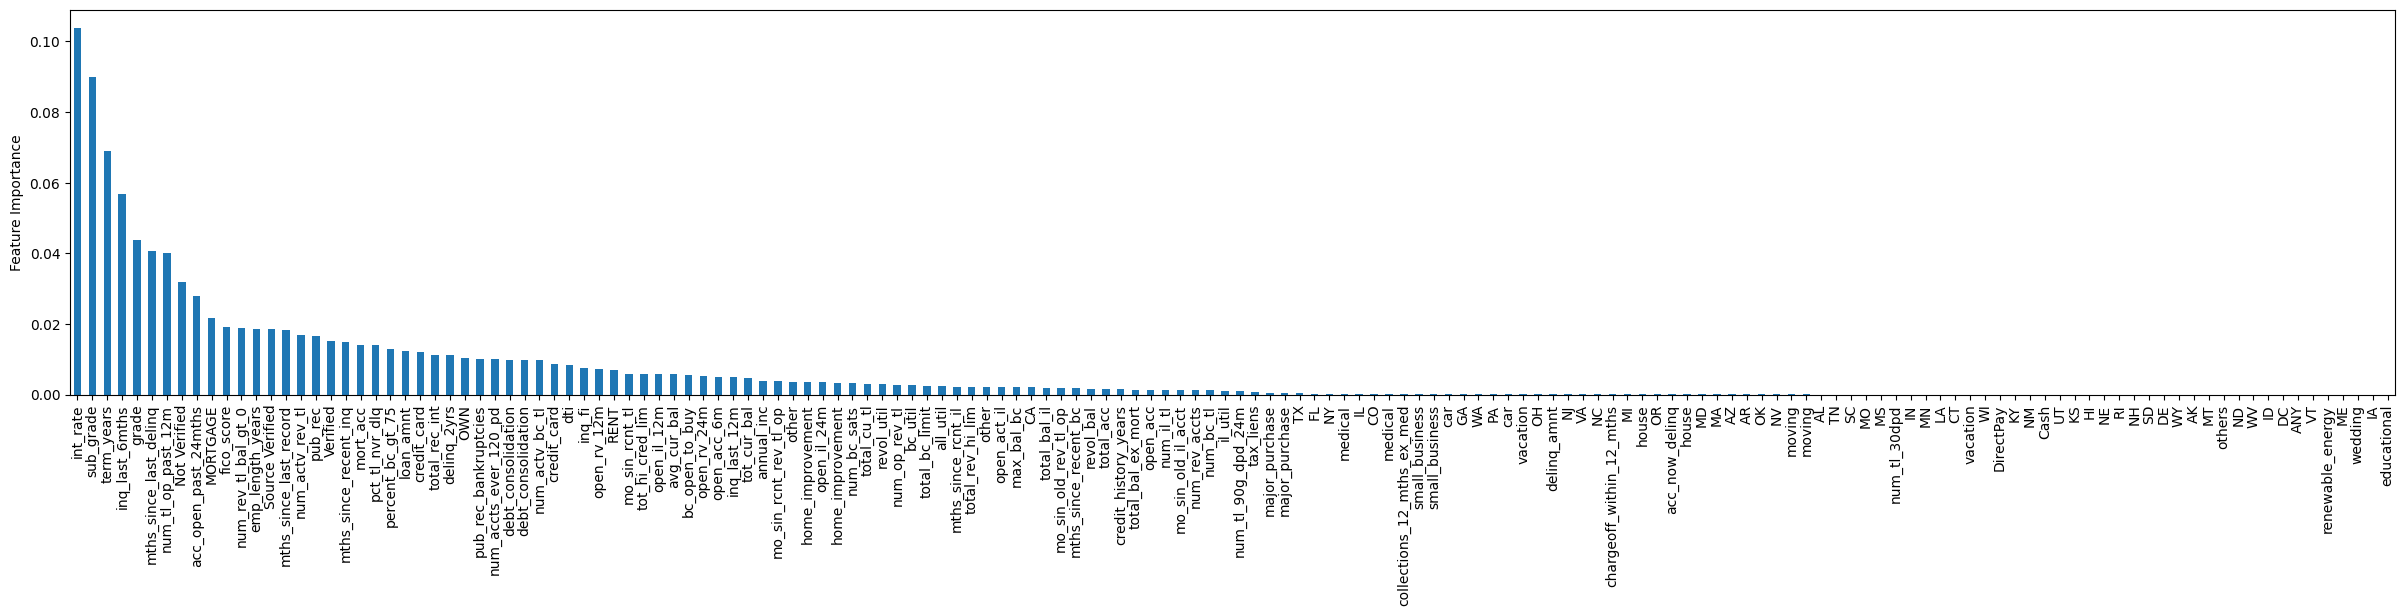

In [ ]:
feature_importance.plot(kind = 'bar', figsize=(30,5))
plt.ylabel("Feature Importance")

In [ ]:
top_20_feature_list = feature_importance.head(20).index.to_list()
top_15_feature_list = feature_importance.head(20).index.to_list()

In [ ]:
feature_importance.head(20)

int_rate                  0.103815
sub_grade                 0.090078
term_years                0.069046
inq_last_6mths            0.056685
grade                     0.043905
mths_since_last_delinq    0.040788
num_tl_op_past_12m        0.040080
Not Verified              0.031871
acc_open_past_24mths      0.027840
MORTGAGE                  0.021562
fico_score                0.019258
num_rev_tl_bal_gt_0       0.018925
emp_length_years          0.018649
Source Verified           0.018555
mths_since_last_record    0.018435
num_actv_rev_tl           0.016808
pub_rec                   0.016671
Verified                  0.015231
mths_since_recent_inq     0.015043
mort_acc                  0.014041
dtype: float64

In [ ]:
top_20_feature_list

['int_rate',
 'sub_grade',
 'term_years',
 'inq_last_6mths',
 'grade',
 'mths_since_last_delinq',
 'num_tl_op_past_12m',
 'Not Verified',
 'acc_open_past_24mths',
 'MORTGAGE',
 'fico_score',
 'num_rev_tl_bal_gt_0',
 'emp_length_years',
 'Source Verified',
 'mths_since_last_record',
 'num_actv_rev_tl',
 'pub_rec',
 'Verified',
 'mths_since_recent_inq',
 'mort_acc']

In [ ]:
['int_rate',
 'sub_grade',
 'term_years',
 'inq_last_6mths',
 'grade',
 'mths_since_last_delinq',
 'num_tl_op_past_12m',
 'Not Verified',
 'acc_open_past_24mths',
 'MORTGAGE',
 'fico_score',
 'num_rev_tl_bal_gt_0',
 'emp_length_years',
 'Source Verified',
 'mths_since_last_record',
 'num_actv_rev_tl',
 'pub_rec',
 'Verified',
 'mths_since_recent_inq',
 'mort_acc']

In [ ]:
df2 = df1[top_20_feature_list]

In [ ]:
df2['loan_status'] = df1['loan_status']

<ipython-input-94-3d51e4b252b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['loan_status'] = df1['loan_status']


In [ ]:
df2.head()

,int_rate,sub_grade,term_years,inq_last_6mths,grade,mths_since_last_delinq,num_tl_op_past_12m,Not Verified,acc_open_past_24mths,MORTGAGE,fico_score,num_rev_tl_bal_gt_0,emp_length_years,Source Verified,mths_since_last_record,num_actv_rev_tl,pub_rec,Verified,mths_since_recent_inq,mort_acc,loan_status
0,9.16,6,3,1.0,1,999.0,0.0,1,1.0,1,707.0,7.0,10.0,0,999.0,7.0,0.0,0,2.0,4.0,0
1,10.42,7,3,0.0,1,999.0,0.0,0,2.0,1,707.0,5.0,5.0,0,999.0,5.0,0.0,1,5.0,1.0,0
2,12.99,10,3,1.0,2,49.0,0.0,1,0.0,0,672.0,8.0,7.0,0,999.0,8.0,0.0,0,3.0,0.0,1
3,16.29,15,3,0.0,3,65.0,5.0,0,9.0,0,682.0,3.0,2.0,1,999.0,3.0,0.0,0,12.0,0.0,1
4,13.18,12,5,1.0,2,999.0,1.0,0,3.0,0,667.0,3.0,2.0,1,70.0,3.0,1.0,0,5.0,2.0,0


In [ ]:
#------------------------------------------------Extra tests---------------------------------------------------------------------------------
#Increasing the minority class to 75% , did not imporve any performance

In [ ]:
df_upsampled = oversampling_smote(df1, 'loan_status', upsample_ratio=0.75, random_state=7)

#shape of upsampled data
print(f"\nShape of the oversampled DataFrame: {df_upsampled.shape}")

#increase in length data
original_size = len(df1)
oversampled_size = len(df_upsampled)
percentage_increase = ((oversampled_size - original_size) / original_size) * 100

print(f"Percentage increase in data: {percentage_increase:.2f}%")


X = df_upsampled.drop('loan_status', axis=1)
y = df_upsampled['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size==0.8, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Original class distribution:
loan_status
0    733482
1    247784
Name: count, dtype: int64
Majority class: 733482
Minority class: 247784

Oversampled class distribution:
loan_status
0    733482
1    433622
Name: count, dtype: int64

Shape of the oversampled DataFrame: (1167104, 21)
Percentage increase in data: 18.94%

Training set shape: (933683, 20)
Testing set shape: (233421, 20)


In [ ]:
rf = RandomForestClassifier( max_depth= 12, n_estimators= 100, random_state = 29) #hyperparameter tunning done on number of trees
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, random_state=29)

In [ ]:
pred = rf.predict(X_test)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84    146928
           1       0.80      0.52      0.63     86493

    accuracy                           0.78    233421
   macro avg       0.78      0.72      0.74    233421
weighted avg       0.78      0.78      0.76    233421

